The next tutorial was taked from https://koldopina.com/regresion-lineal-simple/

# 1. SCKIT-LEARN

### 1. Imports and load data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math

/home/vic/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vic/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
slr_df = pd.read_csv('data_LR.csv', sep="|", decimal=",")

### 2. First approach to data

In [4]:
slr_df.head()

,OUTDOOR_TEMP,ELECTRIC_POWER
0,30.248541,NaN
1,31.321108,324.54
2,32.704262,NaN
3,24.938467,252.70
4,33.316906,331.10


In [6]:
slr_df.describe()

,OUTDOOR_TEMP,ELECTRIC_POWER
count,1496.000000,1494.000000
mean,28.544429,286.214465
std,6.364375,41.516466
min,0.000000,0.000000
25%,26.204395,261.550000
50%,29.232194,288.620000
75%,32.470816,315.852500
max,38.310135,391.710000


In [7]:
slr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496 entries, 0 to 1495
Data columns (total 2 columns):
OUTDOOR_TEMP      1496 non-null float64
ELECTRIC_POWER    1494 non-null float64
dtypes: float64(2)
memory usage: 23.5 KB


In [8]:
print('_'*30 + 'NULL VALUES')
slr_df.isnull().sum()

______________________________NULL VALUES


OUTDOOR_TEMP      0
ELECTRIC_POWER    2
dtype: int64

# Remove the null values

In [9]:
slr_df = slr_df.dropna()

### 3. Explore the data

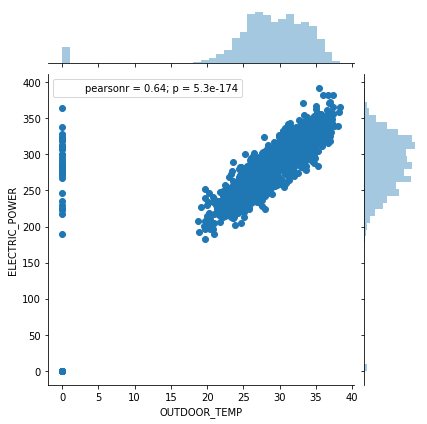

In [11]:
sns.jointplot(data=slr_df, x='OUTDOOR_TEMP', y='ELECTRIC_POWER')

### We can detect outlier values, since in Madrid in August the temperature can`t be 0 degrees

In [12]:
slr_df = slr_df[slr_df.OUTDOOR_TEMP != 0]

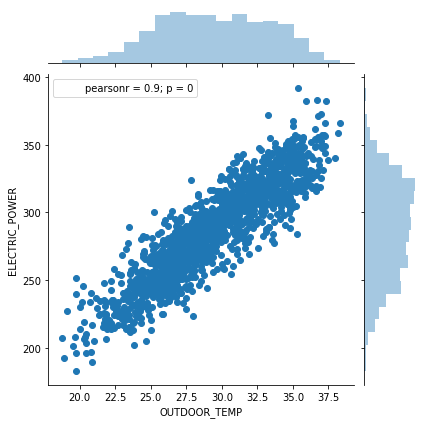

In [13]:
sns.jointplot(data=slr_df, x='OUTDOOR_TEMP', y='ELECTRIC_POWER')

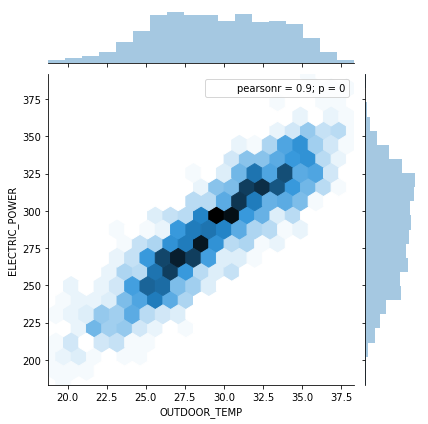

In [14]:
# We going to see the point density
sns.jointplot(data=slr_df, x='OUTDOOR_TEMP', y='ELECTRIC_POWER', kind='hex')

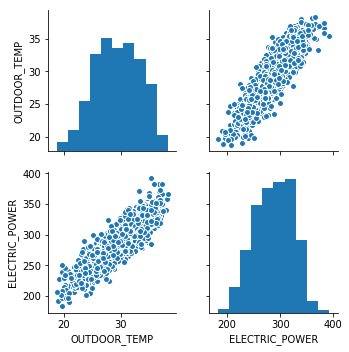

In [15]:
# Pairplot
sns.pairplot(slr_df)

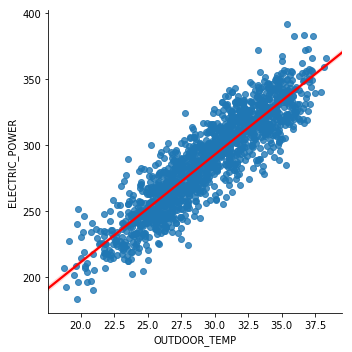

In [18]:
sns.lmplot(data=slr_df, x='OUTDOOR_TEMP', y='ELECTRIC_POWER', line_kws={'color': 'red'})

### 4. Create/Split the training and testing data

In [25]:
X = slr_df['OUTDOOR_TEMP'].values.reshape(-1,1) # -1 for not specify value, and the numpy will inferre. Size 1
y = slr_df['ELECTRIC_POWER'].values.reshape(-1,1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### 5. Create and train the model

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
slope = lm.coef_
intercept = lm.intercept_

print('La recta de regresión es: y = %f + %f * X' % (intercept, slope))

La recta de regresión es: y = 48.078355 + 8.149359 * X


The straight obtained is similar to the obtained manually in the other exercise

### 6. Predict with test data

In [32]:
predictions = lm.predict(X_test)

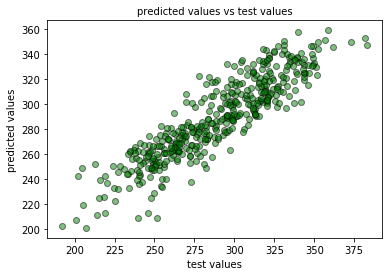

In [34]:
plt.scatter(y_test, predictions, c='g', edgecolors=(0,0,0), alpha=0.5)
plt.title('predicted values vs test values', fontsize=10)
plt.xlabel('test values')
plt.ylabel('predicted values')
plt.show()

### 7. Evaluate the model

In [36]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))

MAE:  12.731898625424552


In [37]:
print('MSE: ', metrics.mean_squared_error(y_test, predictions))

MSE:  251.41283940615148


In [38]:
print('RSME: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RSME:  15.856003260789002


In [39]:
print('explained_variance_score', metrics.explained_variance_score(y_test, predictions))
print('r2_score', metrics.r2_score(y_test, predictions))

explained_variance_score 0.8068705820651054
r2_score 0.8068238090094082


### Check the errors distribution

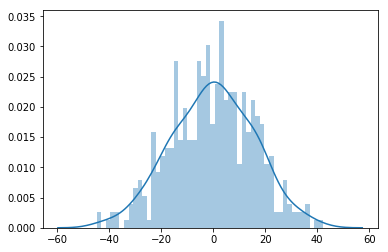

In [49]:
sns.distplot((y_test - predictions), bins=50)
plt.show()